In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import reuters

In [25]:
(x_train,y_train),(x_test,y_test) = reuters.load_data(num_words = 10000)

In [26]:
index_value = reuters.get_word_index()

In [27]:
index_value

{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [28]:
reverse_index = { x:y for (y,x) in index_value.items()}

In [29]:
def get_sentence(sequence):
  final_sentence = []
  for value in sequence:
    final_sentence.append(reverse_index[value])
  s = ' '.join(l for l in final_sentence)
  return s


In [30]:
get_sentence(x_train[0])

'the of of mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs'

In [31]:
import numpy as np
def vectorised_boolean_mapping_masking(sequence,dimension=10000):
  mask = np.zeros((len(sequence),dimension))
  for i,word in enumerate(sequence):
    mask[i,word] = 1
  return mask

In [32]:
x_train = vectorised_boolean_mapping_masking(x_train)
x_test = vectorised_boolean_mapping_masking(x_test)

In [33]:
x_train.shape

(8982, 10000)

In [34]:
x_val = x_train[:2000]
x_partial_train = x_train[2000:]
y_val = y_train[:2000]
y_partial_train = y_train[2000:]

In [35]:
def to_one_hot(labels,dimension=46):
  mask= np.zeros((len(labels),dimension))
  for i,label in enumerate(labels):
    mask[i,label] = 1
  return mask

In [36]:
y_test = to_one_hot(y_test)
y_val = to_one_hot(y_val)
y_partial_train = to_one_hot(y_partial_train)

In [37]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [51]:
network = Sequential([
                       Dense(64,activation = 'relu',input_shape = (10000,)),
                       Dense(64,activation = 'relu'),
                       Dense(46,activation = 'softmax')
])

In [53]:
network.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [54]:
history = network.fit(x_partial_train,y_partial_train, epochs = 20, validation_data=(x_val,y_val),batch_size = 512)

Epoch 1/20
14/14 [==============================] - 2s 71ms/step - loss: 2.8022 - accuracy: 0.4742 - val_loss: 1.9023 - val_accuracy: 0.6085
Epoch 2/20
14/14 [==============================] - 1s 56ms/step - loss: 1.5366 - accuracy: 0.6855 - val_loss: 1.4729 - val_accuracy: 0.6710
Epoch 3/20
14/14 [==============================] - 1s 55ms/step - loss: 1.1402 - accuracy: 0.7572 - val_loss: 1.2906 - val_accuracy: 0.7115
Epoch 4/20
14/14 [==============================] - 1s 56ms/step - loss: 0.8958 - accuracy: 0.8064 - val_loss: 1.1848 - val_accuracy: 0.7360
Epoch 5/20
14/14 [==============================] - 1s 55ms/step - loss: 0.7237 - accuracy: 0.8453 - val_loss: 1.0845 - val_accuracy: 0.7625
Epoch 6/20
14/14 [==============================] - 1s 53ms/step - loss: 0.5876 - accuracy: 0.8757 - val_loss: 1.0452 - val_accuracy: 0.7680
Epoch 7/20
14/14 [==============================] - 1s 54ms/step - loss: 0.4793 - accuracy: 0.8973 - val_loss: 1.0179 - val_accuracy: 0.7810
Epoch 8/20
14

In [55]:
history_dict = history.history

In [56]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [63]:
epochs = range(1,len(history_dict['loss'])+1)

In [59]:
tr_loss = history_dict['loss']
tr_acc = history_dict['accuracy']
val_loss = history_dict['val_loss']
val_acc = history_dict['val_accuracy']

In [60]:
import matplotlib.pyplot as plt

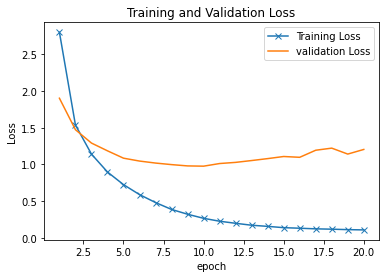

In [65]:
plt.plot(epochs,tr_loss,marker = 'x',label = 'Training Loss')
plt.plot(epochs,val_loss,label = 'validation Loss')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

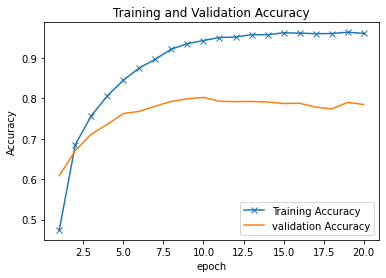

In [66]:
plt.plot(epochs,tr_acc,marker = 'x',label = 'Training Accuracy')
plt.plot(epochs,val_acc,label = 'validation Accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [67]:
#Solving Overfitting Naively by stopping the epoch at 9

In [68]:
network_2 = Sequential([
                       Dense(64,activation = 'relu',input_shape = (10000,)),
                       Dense(64,activation = 'relu'),
                       Dense(46,activation = 'softmax')
])

In [70]:
network_2.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [71]:
history = network_2.fit(x_partial_train,y_partial_train, epochs = 9, validation_data=(x_val,y_val),batch_size = 512)

Epoch 1/9
14/14 [==============================] - 2s 69ms/step - loss: 2.7751 - accuracy: 0.5023 - val_loss: 1.9642 - val_accuracy: 0.6095
Epoch 2/9
14/14 [==============================] - 1s 52ms/step - loss: 1.5880 - accuracy: 0.6855 - val_loss: 1.4859 - val_accuracy: 0.6875
Epoch 3/9
14/14 [==============================] - 1s 52ms/step - loss: 1.1563 - accuracy: 0.7575 - val_loss: 1.2946 - val_accuracy: 0.7225
Epoch 4/9
14/14 [==============================] - 1s 51ms/step - loss: 0.9133 - accuracy: 0.8147 - val_loss: 1.1751 - val_accuracy: 0.7575
Epoch 5/9
14/14 [==============================] - 1s 51ms/step - loss: 0.7402 - accuracy: 0.8472 - val_loss: 1.1016 - val_accuracy: 0.7700
Epoch 6/9
14/14 [==============================] - 1s 51ms/step - loss: 0.6034 - accuracy: 0.8807 - val_loss: 1.0499 - val_accuracy: 0.7805
Epoch 7/9
14/14 [==============================] - 1s 52ms/step - loss: 0.4973 - accuracy: 0.9007 - val_loss: 1.0243 - val_accuracy: 0.7830
Epoch 8/9
14/14 [===

In [72]:
network.evaluate(x_test,y_test)

71/71 [==============================] - 1s 5ms/step - loss: 1.2797 - accuracy: 0.7689


[1.2796767950057983, 0.7689225077629089]

In [73]:
network_2.evaluate(x_test,y_test)

71/71 [==============================] - 0s 4ms/step - loss: 1.0302 - accuracy: 0.7792


[1.0301613807678223, 0.7791629433631897]

In [74]:
#predicting

In [76]:
y_pred = network_2.predict(x_test[0].reshape((-1,10000)))

In [77]:
y_pred

array([[1.4347557e-05, 3.4724289e-05, 2.6732100e-06, 9.3958056e-01,
        5.7836052e-02, 1.2419305e-06, 1.5323689e-06, 1.0144247e-05,
        2.5684483e-04, 5.9754643e-07, 2.1083640e-06, 5.2435262e-05,
        1.9669328e-04, 9.0563895e-05, 6.6352145e-06, 1.5978380e-06,
        9.7411845e-05, 4.4942954e-05, 4.6544774e-05, 4.0038483e-04,
        1.6582549e-04, 5.8399275e-04, 1.6936076e-06, 1.6997265e-05,
        8.6837247e-07, 1.9108587e-05, 1.7841584e-06, 5.8035421e-06,
        1.1464120e-05, 1.7001943e-04, 1.4169507e-05, 5.8483590e-07,
        2.9173512e-07, 3.4711422e-06, 4.9792830e-05, 1.7462090e-06,
        1.9693842e-04, 5.3506765e-06, 6.7817346e-08, 2.8536981e-05,
        1.8577179e-05, 8.2725865e-06, 3.1538389e-06, 8.4067569e-06,
        4.0857090e-06, 7.9502036e-07]], dtype=float32)

In [78]:
y_pred.shape

(1, 46)

In [79]:
np.argmax(y_pred)

3

In [80]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [81]:
np.argmax(y_test[0])

3